In [1]:
# Importing the necessary packages
from sympy import *
import matplotlib.pyplot as plt

In [2]:
r_1,r_2,n = symbols('r_1,r_2,n')       # Defining new symbols. You can use LaTeX here

M = Matrix([[1-r_1,r_2],[r_1,1-r_2]])  # Defining the transition matrix

display(M)                             # Display the answer (it's like printing, for symbolic objects)

Matrix([
[1 - r_1,     r_2],
[    r_1, 1 - r_2]])

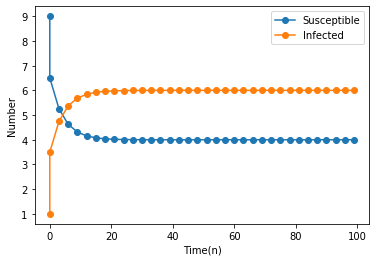

In [10]:
# Numerical values of parameters ############

rONE=0.3
rTWO=0.2

#############################################


M = M.subs(r_1,rONE).subs(r_2,rTWO)         # Substitute the values of r_1 and r_2 in the matrix

psi_0 = Matrix([9,1])                       # Initial state

psi_n = M**n*psi_0                          # Arbitrary state psi_n


# Determining psi_\inf ######################

psi_n_inf = []                              # Start off with an empty vector, psi_n_inf

for el in psi_n:                            # For each element in psi_n
    psi_n_inf.append(Limit(el,n,oo).doit()) # take the limit n -> \infty, and add it to psi_n_inf


psi_n_inf = Matrix(psi_n_inf)               # Make psi_n_inf into a matrix object

# Calculating psi_n at different n ##########

temp = psi_0                                # Starting state

S_list = []                                 # Lists for S, I,and t
I_list = []
t_list = []

S_list.append(9)                            # Initialising them
I_list.append(1)
t_list.append(0)


for i in range(0,100,3):                    # For every time-step
    temp = M*temp                           # Find M^i temp
    S_list.append(temp[0])                  # Append the values of the lists
    I_list.append(temp[1])
    t_list.append(i)

# Graph the results #########################
plt.xlabel('Time(n)')                       
plt.ylabel('Number')
plt.plot(t_list,S_list,'o-',label='Susceptible')
plt.plot(t_list,I_list,'o-',label='Infected')
plt.legend()
plt.show()
#############################################

In [11]:
def SIS(r_1,r_2,init_S,init_I):
    
    M = Matrix([[1-r_1,r_2],[r_1,1-r_2]])       # Defining the transition matrix

    psi_0 = Matrix([init_S,init_I])             # Initial state
             
    psi_n = M**n*psi_0                          # Arbitrary state psi_n

    # Determining psi_\inf ######################

    psi_n_inf = []                              # Start off with an empty vector, psi_n_inf

    for el in psi_n:                            # For each element in psi_n
        psi_n_inf.append(Limit(el,n,oo).doit()) # take the limit n -> \infty, and add it to psi_n_inf


    psi_n_inf = Matrix(psi_n_inf)               # Make psi_n_inf into a matrix object

    # Calculating psi_n at different n ##########

    temp = psi_0                                # Starting state

    S_list = []                                 # Lists for S, I,and t
    I_list = []
    t_list = []

    S_list.append(init_S)                       # Initialising them
    I_list.append(init_I)
    t_list.append(0)

    for i in range(1,20,1):                     # For every time-step
        temp = M*temp                           # Find M^i temp
        S_list.append(temp[0])                  # Append the values of the list
        I_list.append(temp[1])
        t_list.append(i)

    # Graph the results #########################
    plt.xlabel('Time(n)')                      
    plt.ylabel('Number')
    plt.plot(t_list,S_list,'o-')
    plt.plot(t_list,I_list,'o-')
    plt.show()
    #############################################

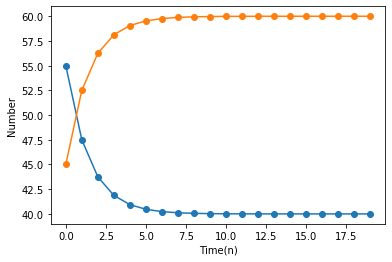

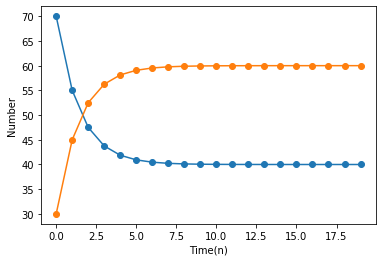

In [13]:
SIS(0.3,0.2,55,45)
SIS(0.3,0.2,70,30)